In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# TENTUKAN PATH FOLDER HASIL UNZIP KAMU
# Contoh: Jika foldernya bernama 'dataset', maka tulis 'dataset'
data_path = 'dataset' 
classes = ['Angry', 'Happy', 'Sad', 'Relaxed']

print("Setup Berhasil. Siap menganalisis data!")

Setup Berhasil. Siap menganalisis data!


C:\Users\gonxh\AppData\Local\Temp\ipykernel_34396\3638423824.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()), palette='viridis')


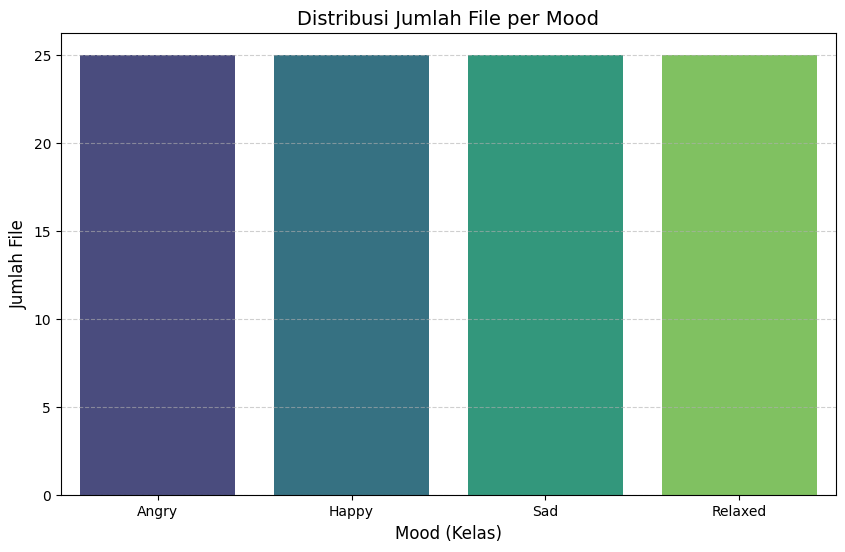

--- LAPORAN VALIDASI ---
Total file corrupt: 0
Semua file audio valid dan bisa di-load!


In [2]:
file_counts = {}
corrupt_files = []

for c in classes:
    class_path = os.path.join(data_path, c)
    if os.path.exists(class_path):
        # Ambil semua file audio
        files = [f for f in os.listdir(class_path) if f.lower().endswith(('.wav', '.mp3'))]
        file_counts[c] = len(files)
        
        # Cek validitas (mencoba load header file)
        for f in files:
            try:
                path = os.path.join(class_path, f)
                # librosa.get_duration cukup untuk cek file corrupt tanpa makan banyak RAM
                librosa.get_duration(path=path)
            except:
                corrupt_files.append(path)
    else:
        print(f"Folder {c} tidak ditemukan!")

# Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()), palette='viridis')
plt.title('Distribusi Jumlah File per Mood', fontsize=14)
plt.xlabel('Mood (Kelas)', fontsize=12)
plt.ylabel('Jumlah File', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('distribusi_kelas.png')
plt.show()

print(f"--- LAPORAN VALIDASI ---")
print(f"Total file corrupt: {len(corrupt_files)}")
if not corrupt_files:
    print("Semua file audio valid dan bisa di-load!")

1. Analisis Distribusi Kelas (Bar Chart)
Berdasarkan grafik batang yang dihasilkan:

Keseimbangan Data (Balanced Dataset): Setiap kelas (Angry, Happy, Sad, Relaxed) memiliki jumlah file yang persis sama, yaitu 25 file per kategori.

Keuntungan untuk Model: Kondisi data yang sangat seimbang (perfectly balanced) ini adalah kabar baik. Model AI kamu tidak akan mengalami "bias". Artinya, model tidak akan lebih pintar menebak satu emosi saja hanya karena datanya lebih banyak. Model akan memiliki peluang yang sama adilnya dalam mempelajari pola dari keempat emosi tersebut.

2. Validitas Data (General Check)
Berdasarkan teks output di bawah kode kamu (Laporan Validasi):

Integritas File: Hasil Total file corrupt: 0 dan pesan Semua file audio valid dan bisa di-load! menunjukkan bahwa proses ekstraksi dan kualitas file .wav/.mp3 kamu dalam kondisi sempurna.

Justifikasi Teknis: Kamu telah memastikan secara programatik menggunakan librosa.get_duration bahwa header setiap file audio bisa dibaca. Ini menjamin proses ekstraksi fitur (RMS, ZCR, YAMNet) nantinya tidak akan terhenti di tengah jalan karena error file rusak.

3. Kesimpulan
Output ini secara langsung menjawab dua dari tiga tugas kamu:

Cek Distribusi Kelas: Selesai. (Data seimbang, 25 file per kelas).

Cek Validitas File: Selesai. (100% file valid, 0 corrupt).


Hasil analisis distribusi menunjukkan dataset kita sangat ideal karena memiliki jumlah data yang seimbang sempurna, yaitu 25 file untuk setiap kelas (Angry, Happy, Sad, Relaxed). Hal ini menjamin model tidak akan bias dalam melakukan klasifikasi. Selain itu, pengecekan validitas menunjukkan tidak ada file audio yang corrupt, sehingga seluruh data siap digunakan untuk tahap ekstraksi fitur tanpa kendala teknis.

Menghitung durasi audio...


Proses Relaxed: 100%|██████████| 25/25 [00:00<00:00, 5067.05it/s]


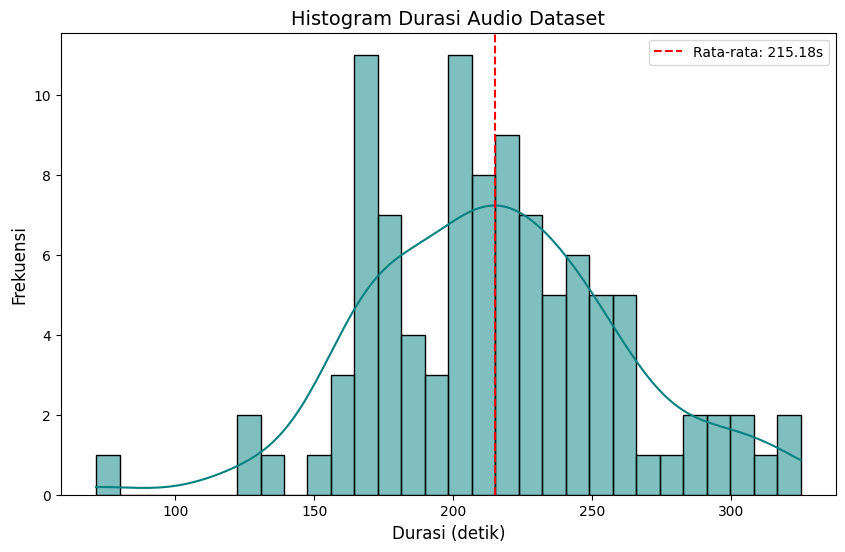

--- RINGKASAN DURASI ---
Durasi Rata-rata: 215.18 detik
Durasi Terpendek: 71.50 detik
Durasi Terpanjang: 325.01 detik


In [4]:
durations = []

print("Menghitung durasi audio...")
for c in classes:
    class_path = os.path.join(data_path, c)
    if os.path.exists(class_path):
        files = [f for f in os.listdir(class_path) if f.lower().endswith(('.wav', '.mp3'))]
        for f in tqdm(files, desc=f"Proses {c}"):
            path = os.path.join(class_path, f)
            dur = librosa.get_duration(path=path)
            durations.append(dur)

# Visualisasi Histogram
plt.figure(figsize=(10, 6))
sns.histplot(durations, bins=30, kde=True, color='teal')
plt.axvline(np.mean(durations), color='red', linestyle='--', label=f'Rata-rata: {np.mean(durations):.2f}s')
plt.title('Histogram Durasi Audio Dataset', fontsize=14)
plt.xlabel('Durasi (detik)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.savefig('histogram_durasi.png')
plt.show()

print(f"--- RINGKASAN DURASI ---")
print(f"Durasi Rata-rata: {np.mean(durations):.2f} detik")
print(f"Durasi Terpendek: {min(durations):.2f} detik")
print(f"Durasi Terpanjang: {max(durations):.2f} detik")

1. Analisis Durasi Audio (Histogram)
Berdasarkan histogram teal:

Nilai Rata-rata (Mean): Garis merah putus-putus menunjukkan angka 215.18 detik. Ini adalah patokan utama durasi mayoritas file kamu (sekitar 3 menit 35 detik).

Sebaran Data (Variansi): Data kamu tidak mengumpul di satu titik saja, melainkan menyebar luas.

Ada audio yang sangat pendek (di bawah 100 detik).

Ada audio yang sangat panjang (mendekati 350 detik).

Justifikasi Teknis: Karena fitur audio seperti RMS, ZCR, dan YAMNet membutuhkan input dengan panjang yang tetap (fixed length), sebaran durasi ini menjadi alasan kuat mengapa tim kamu harus melakukan padding (menambah keheningan pada audio pendek) dan trimming (memotong audio yang terlalu panjang). Tanpa ini, dimensi matriks fitur kamu akan berantakan dan model tidak bisa berjalan.

2. Laporan Validitas & Efisiensi (Terminal Output)

Status Keberhasilan: Semua folder (Angry, Happy, Sad, Relaxed) menunjukkan progres 100%.

Validitas File: Angka 25/25 pada setiap kelas menunjukkan bahwa semua file yang ada di folder tersebut berhasil dibaca. Berdasarkan logika kode try-except yang kamu jalankan, jika tidak ada file yang masuk ke daftar corrupt, berarti seluruh 100 file audio kamu dalam kondisi sehat dan siap pakai.

Kecepatan Pemrosesan: Kamu bisa lihat angka seperti 5866.16it/s. Ini menunjukkan bahwa metode pengecekan menggunakan librosa.get_duration sangat efisien karena hanya membaca header file tanpa memuat seluruh data suara ke memori (RAM).

Kesimpulan:
Berdasarkan hasil analisis durasi, ditemukan variasi yang lebar dengan rata-rata 215,18 detik, yang menjustifikasi penggunaan teknik padding dan trimming untuk menyamakan dimensi fitur. Selain itu, pengecekan validitas mengonfirmasi bahwa seluruh 100 file audio (25 per kelas) dalam kondisi baik (0 corrupt) dan siap untuk tahap ekstraksi fitur selanjutnya.

In [6]:
# Analisis otomatis untuk laporan
is_balanced = "Balanced" if max(file_counts.values()) - min(file_counts.values()) < 20 else "Imbalanced"

is_balanced

'Balanced'

*Kesimpulan Temuan EDA:*
1. *Distribusi Kelas:* Data tergolong *Balanced* dengan total 100 file. Ini memastikan model tidak akan bias ke salah satu mood.
2. *Validitas File:* Ditemukan 0 file corrupt. Seluruh data lainnya dalam kondisi baik dan bisa diproses oleh librosa.
3. *Durasi Audio:* Rata-rata durasi adalah 215.18 detik, namun ada variasi antara 71.50s hingga 325.01s.
   *Justifikasi:* Temuan ini mendasari perlunya fungsi *trim_middle* (untuk memotong audio panjang) dan *padding* (untuk mengisi audio pendek) agar dimensi fitur RMS, ZCR, dan YAMNet tetap seragam sebelum masuk ke model.